In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

In [2]:
test = pd.read_csv('../my/titanic/test.csv')
train = pd.read_csv('../my/titanic/train.csv')
genger_submission = pd.read_csv('../my/titanic/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

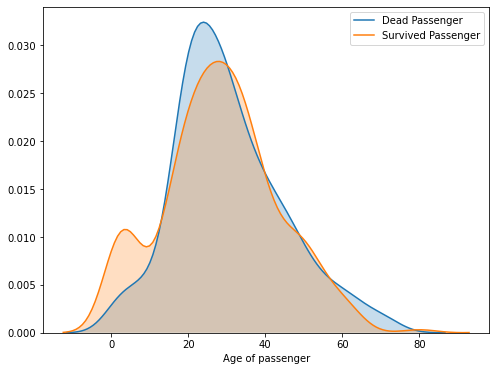

In [5]:
plt.figure(figsize=(8, 6))
sns.kdeplot(train[train['Survived']==0]['Age'], shade=True, label='Dead Passenger')
sns.kdeplot(train[train['Survived']==1]['Age'], shade=True, label='Survived Passenger');
plt.xlabel('Age of passenger')
plt.legend();

Признаки не коррелируют между собой, это хорошо

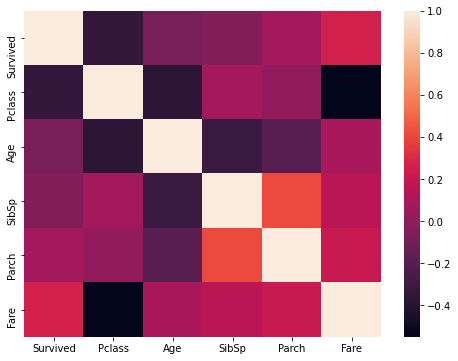

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.corr());

# Создание новых признаков

In [7]:
y_train = train['Survived']
X_train = train.drop(['Survived'], axis=1)

In [8]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [10]:
X_train.drop(['Cabin'], axis=1, inplace=True)
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_train['Embarked'].fillna('S', inplace=True)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [12]:
X_test = test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [13]:
X_test.drop(['Cabin'], axis=1, inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)

In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [15]:
def create_double_feature(dataset, name1, name2):
    """
    Создает новый признак в dataset: name1_name2.
    Функция для учета совместного влияния двух категориальных переменных
    на целевую переменную.
    """
    new_feature = name1 + '_' + name2
    a = dataset[[name1]].values.astype('str')
    b = dataset[[name2]].values.astype('str')
    dataset[new_feature] = list(map(lambda xy: xy[0][0] + '_' + xy[1][0], zip(a, b)))

In [16]:
create_double_feature(X_train, 'Pclass', 'Sex')
create_double_feature(X_train, 'Pclass', 'Embarked')
create_double_feature(X_train, 'Sex', 'Embarked')

create_double_feature(X_test, 'Pclass', 'Sex')
create_double_feature(X_test, 'Pclass', 'Embarked')
create_double_feature(X_test, 'Sex', 'Embarked')

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
int_columns = np.hstack((X_train.columns[X_train.dtypes == 'float64'].values,
          X_train.columns[X_train.dtypes == 'int64'].values))

In [19]:
scaler = StandardScaler()
X_train[int_columns] = scaler.fit_transform(X_train[int_columns])
X_test[int_columns] = scaler.transform(X_test[int_columns])

In [20]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Создание моделей

In [21]:
def create_data(data, name_for_csv, index=np.arange(892, 1310),
                       cols=['Survived'], index_label='PassengerId'):
    pd.DataFrame(data, index=index, columns=cols).to_csv(name_for_csv, index_label=index_label)

## Random Forest Class

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [23]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
cross_val_score(rf, X_train, y_train).mean()

0.8058753373925052

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [25]:
y_pred = rf.predict(X_test)
create_data(y_pred, 'random_forest.csv')

In [26]:
!kaggle competitions submit -c titanic -f random_forest.csv -m "Random Forest + tuned obj. params"

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 16.2kB/s]
100%|##########| 3.18k/3.18k [00:04<00:00, 790B/s]  


## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
n_neigh = np.arange(1, 100)
cv_n = {}
for n in n_neigh:
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_n[n] = cross_val_score(knn, X_train, y_train).mean()

In [29]:
i_max = np.array(list(cv_n.values())).argmax()
n_max = list(cv_n.keys())[i_max]
print('Optimal N is %d' %n_max)

Optimal N is 12


In [30]:
knn = KNeighborsClassifier(n_neighbors=n_max)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [31]:
create_data(y_pred_knn, 'knn.csv')
!kaggle competitions submit -c titanic -f knn.csv -m "KNN, n = 12"

Successfully submitted to Titanic: Machine Learning from Disaster


  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 22.3kB/s]
100%|##########| 3.18k/3.18k [00:05<00:00, 546B/s]  


## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)
create_data(y_pred_logit, 'logit.csv')
!kaggle competitions submit -c titanic -f logit.csv -m "Logistic Regression"
!kaggle competitions submissions titanic

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 25.8kB/s]
100%|##########| 3.18k/3.18k [00:03<00:00, 849B/s]  


fileName           date                 description                        status    publicScore  privateScore  
-----------------  -------------------  ---------------------------------  --------  -----------  ------------  
logit.csv          2020-08-21 14:45:22  Logistic Regression                complete  0.78229      None          
knn.csv            2020-08-21 14:45:16  KNN, n = 12                        complete  0.77751      None          
random_forest.csv  2020-08-21 14:44:44  Random Forest + tuned obj. params  complete  0.75598      None          
nn.csv             2020-07-08 19:12:52  Neural Net zhir                    complete  0.77272      None          
nn.csv             2020-07-08 18:49:45  Neural Net zhir                    complete  0.77990      None          
nn.csv             2020-07-08 18:38:48  Neural Net zhir                    complete  0.78468      None          
nn.csv             2020-07-08 18:34:18  Neural Net zhir                    complete  0.77751    

## Try to tune Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
%%time
params = {'max_depth': np.arange(1, 10),
          'min_samples_split': np.arange(1, 10),
          'min_samples_leaf': np.arange(1, 10),
          'n_estimators': [100]}

rf = RandomForestClassifier()
rf_gridCV = GridSearchCV(rf, params, n_jobs=-1, cv=5)
rf_gridCV.fit(X_train, y_train)

Wall time: 11min 53s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100]})

In [36]:
rf_gridCV.best_score_

0.8305442219571904

In [37]:
best_params = {'max_depth': [9],
                 'min_samples_leaf': [1],
                 'min_samples_split': [6],
                 'n_estimators': np.linspace(100, 1000, 10, dtype='int')
              }

In [38]:
%%time
rf_estim = GridSearchCV(rf, best_params, cv=5, n_jobs=-1)
rf_estim.fit(X_train, y_train)
print(rf_estim.best_score_, rf_estim.best_params_)

0.8226853304877283 {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1000}
Wall time: 1min 17s


In [39]:
y_pred_rf_tuned = rf_estim.best_estimator_.predict(X_test)
create_data(y_pred_rf_tuned, 'rf_tuned.csv')
!kaggle competitions submit -c titanic -f rf_tuned.csv -m "Random Forest tuned"
!kaggle competitions submissions titanic

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 18.7kB/s]
100%|##########| 3.18k/3.18k [00:06<00:00, 503B/s]  


fileName           date                 description                        status    publicScore  privateScore  
-----------------  -------------------  ---------------------------------  --------  -----------  ------------  
rf_tuned.csv       2020-08-21 14:58:44  Random Forest tuned                complete  0.77751      None          
logit.csv          2020-08-21 14:45:22  Logistic Regression                complete  0.78229      None          
knn.csv            2020-08-21 14:45:16  KNN, n = 12                        complete  0.77751      None          
random_forest.csv  2020-08-21 14:44:44  Random Forest + tuned obj. params  complete  0.75598      None          
nn.csv             2020-07-08 19:12:52  Neural Net zhir                    complete  0.77272      None          
nn.csv             2020-07-08 18:49:45  Neural Net zhir                    complete  0.77990      None          
nn.csv             2020-07-08 18:38:48  Neural Net zhir                    complete  0.78468    

## XGBoost

In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [41]:
params = {
    'max_depth': np.arange(1, 25),
    'subsample': np.linspace(0, 1, 11),
    'colsample_bytree': np.linspace(0, 1, 11),
    'alpha': np.linspace(0, 1, 11),
    'lambda': np.linspace(0, 1, 11),
    'eta': np.linspace(0, 1, 11),
    'n_estimators': [50],
    'learning_rate': [0.01]
}

In [42]:
%%time
xgb = XGBClassifier(n_jobs=-1, random_state=17)
rsCV_xgb = RandomizedSearchCV(xgb, params, n_iter=1500, cv=5, n_jobs=-1, random_state=17)
rsCV_xgb.fit(X_train, y_train)
print(rsCV_xgb.best_score_, rsCV_xgb.best_params_)

0.8406503044378884 {'subsample': 0.7000000000000001, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.01, 'lambda': 0.0, 'eta': 0.1, 'colsample_bytree': 0.9, 'alpha': 0.30000000000000004}
Wall time: 7min 41s


In [43]:
best_params = {'subsample': [0.7], 
               'n_estimators': np.linspace(50, 500, 10, dtype='int'), 
               'max_depth': [8], 
               'learning_rate': np.linspace(0, 0.5, 50), 
               'lambda': [0.0], 
               'eta': [0.1], 
               'colsample_bytree':[0.9],
               'alpha': [0.3]}

In [44]:
%%time
best_rsCV_xgb = RandomizedSearchCV(xgb, best_params, n_iter=500, cv=5, n_jobs=-1, random_state=17)
best_rsCV_xgb.fit(X_train, y_train)
print(rsCV_xgb.best_score_, rsCV_xgb.best_params_)

0.8406503044378884 {'subsample': 0.7000000000000001, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.01, 'lambda': 0.0, 'eta': 0.1, 'colsample_bytree': 0.9, 'alpha': 0.30000000000000004}
Wall time: 17min 11s


In [45]:
y_pred_xgb = best_rsCV_xgb.best_estimator_.predict(X_test)
create_data(y_pred_xgb, 'xgb.csv')
!kaggle competitions submit -c titanic -f xgb.csv -m "XGBoost tuned"
!kaggle competitions submissions titanic

Successfully submitted to Titanic: Machine Learning from Disaster


  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 21.0kB/s]
100%|##########| 3.18k/3.18k [00:02<00:00, 1.18kB/s]



fileName           date                 description                        status    publicScore  privateScore  
-----------------  -------------------  ---------------------------------  --------  -----------  ------------  
xgb.csv            2020-08-21 15:23:52  XGBoost tuned                      complete  0.76555      None          
rf_tuned.csv       2020-08-21 14:58:44  Random Forest tuned                complete  0.77751      None          
logit.csv          2020-08-21 14:45:22  Logistic Regression                complete  0.78229      None          
knn.csv            2020-08-21 14:45:16  KNN, n = 12                        complete  0.77751      None          
random_forest.csv  2020-08-21 14:44:44  Random Forest + tuned obj. params  complete  0.75598      None          
nn.csv             2020-07-08 19:12:52  Neural Net zhir                    complete  0.77272      None          
nn.csv             2020-07-08 18:49:45  Neural Net zhir                    complete  0.77990   

## CatBoost

In [46]:
import catboost

In [47]:
cb = catboost.CatBoostClassifier()
cross_val_score(cb, X_train, y_train)

Learning rate set to 0.008911
0:	learn: 0.6878031	total: 203ms	remaining: 3m 22s
1:	learn: 0.6822281	total: 207ms	remaining: 1m 43s
2:	learn: 0.6768917	total: 212ms	remaining: 1m 10s
3:	learn: 0.6708441	total: 217ms	remaining: 53.9s
4:	learn: 0.6650296	total: 221ms	remaining: 43.9s
5:	learn: 0.6598409	total: 226ms	remaining: 37.4s
6:	learn: 0.6547256	total: 230ms	remaining: 32.6s
7:	learn: 0.6502993	total: 234ms	remaining: 29s
8:	learn: 0.6454260	total: 238ms	remaining: 26.2s
9:	learn: 0.6405161	total: 243ms	remaining: 24.1s
10:	learn: 0.6358457	total: 248ms	remaining: 22.3s
11:	learn: 0.6305960	total: 252ms	remaining: 20.8s
12:	learn: 0.6262570	total: 257ms	remaining: 19.5s
13:	learn: 0.6216876	total: 262ms	remaining: 18.5s
14:	learn: 0.6174572	total: 267ms	remaining: 17.5s
15:	learn: 0.6141369	total: 271ms	remaining: 16.6s
16:	learn: 0.6091815	total: 275ms	remaining: 15.9s
17:	learn: 0.6042431	total: 280ms	remaining: 15.3s
18:	learn: 0.6008258	total: 284ms	remaining: 14.7s
19:	learn:

164:	learn: 0.3972503	total: 1.03s	remaining: 5.22s
165:	learn: 0.3970761	total: 1.03s	remaining: 5.2s
166:	learn: 0.3966392	total: 1.04s	remaining: 5.18s
167:	learn: 0.3962146	total: 1.04s	remaining: 5.17s
168:	learn: 0.3958716	total: 1.05s	remaining: 5.16s
169:	learn: 0.3953327	total: 1.05s	remaining: 5.14s
170:	learn: 0.3950655	total: 1.06s	remaining: 5.13s
171:	learn: 0.3947283	total: 1.06s	remaining: 5.12s
172:	learn: 0.3944851	total: 1.07s	remaining: 5.11s
173:	learn: 0.3941010	total: 1.07s	remaining: 5.1s
174:	learn: 0.3936728	total: 1.08s	remaining: 5.09s
175:	learn: 0.3933526	total: 1.08s	remaining: 5.08s
176:	learn: 0.3930195	total: 1.09s	remaining: 5.07s
177:	learn: 0.3925337	total: 1.09s	remaining: 5.06s
178:	learn: 0.3920734	total: 1.1s	remaining: 5.04s
179:	learn: 0.3917452	total: 1.1s	remaining: 5.03s
180:	learn: 0.3913326	total: 1.11s	remaining: 5.02s
181:	learn: 0.3910016	total: 1.11s	remaining: 5.01s
182:	learn: 0.3906365	total: 1.12s	remaining: 5s
183:	learn: 0.39017

340:	learn: 0.3556206	total: 1.88s	remaining: 3.63s
341:	learn: 0.3556121	total: 1.88s	remaining: 3.63s
342:	learn: 0.3555204	total: 1.89s	remaining: 3.62s
343:	learn: 0.3553865	total: 1.89s	remaining: 3.61s
344:	learn: 0.3552498	total: 1.9s	remaining: 3.6s
345:	learn: 0.3550132	total: 1.9s	remaining: 3.59s
346:	learn: 0.3548478	total: 1.91s	remaining: 3.59s
347:	learn: 0.3546628	total: 1.91s	remaining: 3.58s
348:	learn: 0.3545422	total: 1.92s	remaining: 3.57s
349:	learn: 0.3544288	total: 1.92s	remaining: 3.57s
350:	learn: 0.3543386	total: 1.93s	remaining: 3.56s
351:	learn: 0.3541581	total: 1.93s	remaining: 3.56s
352:	learn: 0.3540190	total: 1.94s	remaining: 3.55s
353:	learn: 0.3537891	total: 1.94s	remaining: 3.54s
354:	learn: 0.3535852	total: 1.95s	remaining: 3.54s
355:	learn: 0.3533091	total: 1.95s	remaining: 3.53s
356:	learn: 0.3530209	total: 1.96s	remaining: 3.52s
357:	learn: 0.3528497	total: 1.96s	remaining: 3.52s
358:	learn: 0.3527301	total: 1.97s	remaining: 3.51s
359:	learn: 0.3

511:	learn: 0.3340859	total: 2.7s	remaining: 2.57s
512:	learn: 0.3339812	total: 2.7s	remaining: 2.57s
513:	learn: 0.3338244	total: 2.71s	remaining: 2.56s
514:	learn: 0.3336196	total: 2.71s	remaining: 2.56s
515:	learn: 0.3334873	total: 2.72s	remaining: 2.55s
516:	learn: 0.3334650	total: 2.72s	remaining: 2.54s
517:	learn: 0.3332092	total: 2.73s	remaining: 2.54s
518:	learn: 0.3331652	total: 2.73s	remaining: 2.53s
519:	learn: 0.3330232	total: 2.73s	remaining: 2.52s
520:	learn: 0.3329052	total: 2.74s	remaining: 2.52s
521:	learn: 0.3328188	total: 2.75s	remaining: 2.52s
522:	learn: 0.3327796	total: 2.75s	remaining: 2.51s
523:	learn: 0.3326210	total: 2.76s	remaining: 2.5s
524:	learn: 0.3325130	total: 2.76s	remaining: 2.5s
525:	learn: 0.3323329	total: 2.77s	remaining: 2.49s
526:	learn: 0.3323068	total: 2.77s	remaining: 2.49s
527:	learn: 0.3322356	total: 2.78s	remaining: 2.48s
528:	learn: 0.3321190	total: 2.78s	remaining: 2.48s
529:	learn: 0.3320234	total: 2.79s	remaining: 2.47s
530:	learn: 0.33

683:	learn: 0.3147958	total: 3.53s	remaining: 1.63s
684:	learn: 0.3146030	total: 3.54s	remaining: 1.63s
685:	learn: 0.3145584	total: 3.54s	remaining: 1.62s
686:	learn: 0.3145067	total: 3.55s	remaining: 1.62s
687:	learn: 0.3143937	total: 3.55s	remaining: 1.61s
688:	learn: 0.3143506	total: 3.56s	remaining: 1.61s
689:	learn: 0.3142989	total: 3.56s	remaining: 1.6s
690:	learn: 0.3141129	total: 3.57s	remaining: 1.59s
691:	learn: 0.3139457	total: 3.57s	remaining: 1.59s
692:	learn: 0.3138768	total: 3.58s	remaining: 1.58s
693:	learn: 0.3136594	total: 3.58s	remaining: 1.58s
694:	learn: 0.3135213	total: 3.59s	remaining: 1.57s
695:	learn: 0.3134552	total: 3.59s	remaining: 1.57s
696:	learn: 0.3134023	total: 3.6s	remaining: 1.56s
697:	learn: 0.3131483	total: 3.6s	remaining: 1.56s
698:	learn: 0.3129159	total: 3.61s	remaining: 1.55s
699:	learn: 0.3127864	total: 3.62s	remaining: 1.55s
700:	learn: 0.3126930	total: 3.62s	remaining: 1.54s
701:	learn: 0.3126099	total: 3.62s	remaining: 1.54s
702:	learn: 0.3

852:	learn: 0.2946164	total: 4.37s	remaining: 753ms
853:	learn: 0.2945730	total: 4.38s	remaining: 748ms
854:	learn: 0.2944587	total: 4.38s	remaining: 743ms
855:	learn: 0.2943540	total: 4.38s	remaining: 737ms
856:	learn: 0.2940992	total: 4.39s	remaining: 732ms
857:	learn: 0.2939276	total: 4.39s	remaining: 727ms
858:	learn: 0.2938294	total: 4.4s	remaining: 722ms
859:	learn: 0.2936324	total: 4.4s	remaining: 717ms
860:	learn: 0.2935133	total: 4.41s	remaining: 712ms
861:	learn: 0.2934211	total: 4.42s	remaining: 707ms
862:	learn: 0.2932415	total: 4.42s	remaining: 702ms
863:	learn: 0.2931869	total: 4.43s	remaining: 697ms
864:	learn: 0.2931385	total: 4.43s	remaining: 692ms
865:	learn: 0.2930935	total: 4.44s	remaining: 686ms
866:	learn: 0.2928550	total: 4.44s	remaining: 681ms
867:	learn: 0.2926810	total: 4.45s	remaining: 676ms
868:	learn: 0.2926414	total: 4.45s	remaining: 671ms
869:	learn: 0.2925574	total: 4.46s	remaining: 666ms
870:	learn: 0.2924846	total: 4.46s	remaining: 661ms
871:	learn: 0.

35:	learn: 0.5395547	total: 161ms	remaining: 4.31s
36:	learn: 0.5363258	total: 165ms	remaining: 4.3s
37:	learn: 0.5333116	total: 171ms	remaining: 4.33s
38:	learn: 0.5308929	total: 175ms	remaining: 4.32s
39:	learn: 0.5282372	total: 180ms	remaining: 4.32s
40:	learn: 0.5258056	total: 184ms	remaining: 4.31s
41:	learn: 0.5230291	total: 189ms	remaining: 4.32s
42:	learn: 0.5203537	total: 194ms	remaining: 4.32s
43:	learn: 0.5177342	total: 200ms	remaining: 4.34s
44:	learn: 0.5154722	total: 205ms	remaining: 4.36s
45:	learn: 0.5132437	total: 211ms	remaining: 4.38s
46:	learn: 0.5108951	total: 218ms	remaining: 4.42s
47:	learn: 0.5091735	total: 223ms	remaining: 4.42s
48:	learn: 0.5065896	total: 228ms	remaining: 4.42s
49:	learn: 0.5046637	total: 233ms	remaining: 4.43s
50:	learn: 0.5018264	total: 239ms	remaining: 4.44s
51:	learn: 0.4996649	total: 243ms	remaining: 4.43s
52:	learn: 0.4975499	total: 249ms	remaining: 4.45s
53:	learn: 0.4948999	total: 254ms	remaining: 4.45s
54:	learn: 0.4926478	total: 259m

207:	learn: 0.3659970	total: 997ms	remaining: 3.8s
208:	learn: 0.3655377	total: 1s	remaining: 3.79s
209:	learn: 0.3653576	total: 1.01s	remaining: 3.79s
210:	learn: 0.3651603	total: 1.01s	remaining: 3.79s
211:	learn: 0.3648819	total: 1.02s	remaining: 3.79s
212:	learn: 0.3645510	total: 1.03s	remaining: 3.81s
213:	learn: 0.3642002	total: 1.04s	remaining: 3.81s
214:	learn: 0.3638897	total: 1.04s	remaining: 3.81s
215:	learn: 0.3634473	total: 1.05s	remaining: 3.81s
216:	learn: 0.3630498	total: 1.05s	remaining: 3.81s
217:	learn: 0.3627442	total: 1.06s	remaining: 3.81s
218:	learn: 0.3623959	total: 1.07s	remaining: 3.81s
219:	learn: 0.3623338	total: 1.07s	remaining: 3.79s
220:	learn: 0.3619963	total: 1.07s	remaining: 3.79s
221:	learn: 0.3617486	total: 1.08s	remaining: 3.79s
222:	learn: 0.3615588	total: 1.09s	remaining: 3.79s
223:	learn: 0.3612284	total: 1.09s	remaining: 3.79s
224:	learn: 0.3610689	total: 1.1s	remaining: 3.78s
225:	learn: 0.3608639	total: 1.1s	remaining: 3.77s
226:	learn: 0.3605

370:	learn: 0.3298882	total: 1.83s	remaining: 3.1s
371:	learn: 0.3297861	total: 1.83s	remaining: 3.09s
372:	learn: 0.3295492	total: 1.84s	remaining: 3.09s
373:	learn: 0.3293686	total: 1.84s	remaining: 3.08s
374:	learn: 0.3291571	total: 1.85s	remaining: 3.08s
375:	learn: 0.3290156	total: 1.85s	remaining: 3.07s
376:	learn: 0.3287682	total: 1.86s	remaining: 3.07s
377:	learn: 0.3286180	total: 1.86s	remaining: 3.06s
378:	learn: 0.3284599	total: 1.87s	remaining: 3.06s
379:	learn: 0.3283812	total: 1.87s	remaining: 3.06s
380:	learn: 0.3283664	total: 1.88s	remaining: 3.05s
381:	learn: 0.3282339	total: 1.88s	remaining: 3.05s
382:	learn: 0.3280369	total: 1.89s	remaining: 3.04s
383:	learn: 0.3278373	total: 1.89s	remaining: 3.04s
384:	learn: 0.3276762	total: 1.9s	remaining: 3.03s
385:	learn: 0.3275063	total: 1.9s	remaining: 3.03s
386:	learn: 0.3274647	total: 1.91s	remaining: 3.02s
387:	learn: 0.3272262	total: 1.91s	remaining: 3.01s
388:	learn: 0.3271713	total: 1.92s	remaining: 3.01s
389:	learn: 0.3

544:	learn: 0.3066835	total: 2.67s	remaining: 2.23s
545:	learn: 0.3065366	total: 2.67s	remaining: 2.22s
546:	learn: 0.3063751	total: 2.68s	remaining: 2.22s
547:	learn: 0.3063148	total: 2.68s	remaining: 2.21s
548:	learn: 0.3061813	total: 2.69s	remaining: 2.21s
549:	learn: 0.3061107	total: 2.69s	remaining: 2.2s
550:	learn: 0.3059741	total: 2.69s	remaining: 2.19s
551:	learn: 0.3058828	total: 2.7s	remaining: 2.19s
552:	learn: 0.3057220	total: 2.7s	remaining: 2.19s
553:	learn: 0.3055898	total: 2.71s	remaining: 2.18s
554:	learn: 0.3055429	total: 2.72s	remaining: 2.18s
555:	learn: 0.3053911	total: 2.72s	remaining: 2.17s
556:	learn: 0.3052592	total: 2.73s	remaining: 2.17s
557:	learn: 0.3050686	total: 2.73s	remaining: 2.16s
558:	learn: 0.3048693	total: 2.74s	remaining: 2.16s
559:	learn: 0.3046883	total: 2.74s	remaining: 2.15s
560:	learn: 0.3046019	total: 2.75s	remaining: 2.15s
561:	learn: 0.3044898	total: 2.75s	remaining: 2.14s
562:	learn: 0.3044277	total: 2.75s	remaining: 2.14s
563:	learn: 0.3

719:	learn: 0.2866582	total: 3.51s	remaining: 1.36s
720:	learn: 0.2864018	total: 3.51s	remaining: 1.36s
721:	learn: 0.2861459	total: 3.52s	remaining: 1.35s
722:	learn: 0.2860577	total: 3.52s	remaining: 1.35s
723:	learn: 0.2859093	total: 3.53s	remaining: 1.34s
724:	learn: 0.2857300	total: 3.53s	remaining: 1.34s
725:	learn: 0.2856964	total: 3.53s	remaining: 1.33s
726:	learn: 0.2855524	total: 3.54s	remaining: 1.33s
727:	learn: 0.2854366	total: 3.54s	remaining: 1.32s
728:	learn: 0.2852724	total: 3.55s	remaining: 1.32s
729:	learn: 0.2852125	total: 3.55s	remaining: 1.31s
730:	learn: 0.2851719	total: 3.56s	remaining: 1.31s
731:	learn: 0.2850634	total: 3.56s	remaining: 1.3s
732:	learn: 0.2849677	total: 3.57s	remaining: 1.3s
733:	learn: 0.2847413	total: 3.57s	remaining: 1.29s
734:	learn: 0.2846070	total: 3.58s	remaining: 1.29s
735:	learn: 0.2845130	total: 3.58s	remaining: 1.28s
736:	learn: 0.2844015	total: 3.59s	remaining: 1.28s
737:	learn: 0.2843278	total: 3.59s	remaining: 1.27s
738:	learn: 0.

890:	learn: 0.2664932	total: 4.34s	remaining: 531ms
891:	learn: 0.2664245	total: 4.35s	remaining: 526ms
892:	learn: 0.2663335	total: 4.35s	remaining: 522ms
893:	learn: 0.2662225	total: 4.36s	remaining: 517ms
894:	learn: 0.2660689	total: 4.36s	remaining: 512ms
895:	learn: 0.2659620	total: 4.37s	remaining: 507ms
896:	learn: 0.2658839	total: 4.38s	remaining: 503ms
897:	learn: 0.2657563	total: 4.38s	remaining: 498ms
898:	learn: 0.2656564	total: 4.39s	remaining: 493ms
899:	learn: 0.2654090	total: 4.39s	remaining: 488ms
900:	learn: 0.2653378	total: 4.4s	remaining: 483ms
901:	learn: 0.2652512	total: 4.4s	remaining: 478ms
902:	learn: 0.2650494	total: 4.41s	remaining: 474ms
903:	learn: 0.2649900	total: 4.41s	remaining: 469ms
904:	learn: 0.2648986	total: 4.42s	remaining: 464ms
905:	learn: 0.2648142	total: 4.42s	remaining: 459ms
906:	learn: 0.2647330	total: 4.43s	remaining: 454ms
907:	learn: 0.2646733	total: 4.43s	remaining: 449ms
908:	learn: 0.2644310	total: 4.44s	remaining: 444ms
909:	learn: 0.

69:	learn: 0.4792117	total: 326ms	remaining: 4.33s
70:	learn: 0.4772079	total: 332ms	remaining: 4.34s
71:	learn: 0.4754908	total: 336ms	remaining: 4.33s
72:	learn: 0.4743884	total: 339ms	remaining: 4.31s
73:	learn: 0.4726555	total: 344ms	remaining: 4.31s
74:	learn: 0.4710093	total: 349ms	remaining: 4.3s
75:	learn: 0.4695658	total: 353ms	remaining: 4.3s
76:	learn: 0.4689243	total: 356ms	remaining: 4.27s
77:	learn: 0.4674935	total: 360ms	remaining: 4.26s
78:	learn: 0.4663463	total: 365ms	remaining: 4.25s
79:	learn: 0.4650267	total: 370ms	remaining: 4.25s
80:	learn: 0.4633654	total: 376ms	remaining: 4.26s
81:	learn: 0.4624407	total: 381ms	remaining: 4.26s
82:	learn: 0.4612740	total: 386ms	remaining: 4.27s
83:	learn: 0.4599431	total: 391ms	remaining: 4.27s
84:	learn: 0.4594201	total: 394ms	remaining: 4.24s
85:	learn: 0.4585954	total: 399ms	remaining: 4.24s
86:	learn: 0.4573547	total: 404ms	remaining: 4.24s
87:	learn: 0.4560756	total: 409ms	remaining: 4.24s
88:	learn: 0.4550777	total: 414ms

244:	learn: 0.3785199	total: 1.16s	remaining: 3.58s
245:	learn: 0.3783347	total: 1.17s	remaining: 3.58s
246:	learn: 0.3781490	total: 1.17s	remaining: 3.58s
247:	learn: 0.3781210	total: 1.18s	remaining: 3.56s
248:	learn: 0.3778011	total: 1.18s	remaining: 3.56s
249:	learn: 0.3776110	total: 1.18s	remaining: 3.55s
250:	learn: 0.3774260	total: 1.19s	remaining: 3.55s
251:	learn: 0.3771301	total: 1.19s	remaining: 3.54s
252:	learn: 0.3769222	total: 1.2s	remaining: 3.54s
253:	learn: 0.3766879	total: 1.2s	remaining: 3.54s
254:	learn: 0.3764224	total: 1.21s	remaining: 3.53s
255:	learn: 0.3760808	total: 1.22s	remaining: 3.54s
256:	learn: 0.3757966	total: 1.22s	remaining: 3.53s
257:	learn: 0.3754450	total: 1.23s	remaining: 3.53s
258:	learn: 0.3751340	total: 1.23s	remaining: 3.52s
259:	learn: 0.3748794	total: 1.24s	remaining: 3.52s
260:	learn: 0.3747499	total: 1.24s	remaining: 3.51s
261:	learn: 0.3745322	total: 1.25s	remaining: 3.51s
262:	learn: 0.3743417	total: 1.25s	remaining: 3.5s
263:	learn: 0.3

418:	learn: 0.3512880	total: 1.99s	remaining: 2.77s
419:	learn: 0.3512404	total: 2s	remaining: 2.76s
420:	learn: 0.3511220	total: 2s	remaining: 2.76s
421:	learn: 0.3509690	total: 2.01s	remaining: 2.75s
422:	learn: 0.3508690	total: 2.01s	remaining: 2.75s
423:	learn: 0.3507888	total: 2.02s	remaining: 2.74s
424:	learn: 0.3506860	total: 2.02s	remaining: 2.74s
425:	learn: 0.3504673	total: 2.03s	remaining: 2.73s
426:	learn: 0.3504155	total: 2.03s	remaining: 2.73s
427:	learn: 0.3503415	total: 2.04s	remaining: 2.73s
428:	learn: 0.3501560	total: 2.04s	remaining: 2.72s
429:	learn: 0.3500409	total: 2.05s	remaining: 2.72s
430:	learn: 0.3499882	total: 2.06s	remaining: 2.71s
431:	learn: 0.3499118	total: 2.06s	remaining: 2.71s
432:	learn: 0.3498723	total: 2.07s	remaining: 2.71s
433:	learn: 0.3497303	total: 2.07s	remaining: 2.7s
434:	learn: 0.3495786	total: 2.08s	remaining: 2.7s
435:	learn: 0.3494542	total: 2.08s	remaining: 2.69s
436:	learn: 0.3493558	total: 2.08s	remaining: 2.69s
437:	learn: 0.349217

593:	learn: 0.3326722	total: 2.83s	remaining: 1.94s
594:	learn: 0.3326077	total: 2.84s	remaining: 1.93s
595:	learn: 0.3324114	total: 2.84s	remaining: 1.93s
596:	learn: 0.3323133	total: 2.85s	remaining: 1.92s
597:	learn: 0.3321850	total: 2.85s	remaining: 1.92s
598:	learn: 0.3320466	total: 2.85s	remaining: 1.91s
599:	learn: 0.3319064	total: 2.86s	remaining: 1.91s
600:	learn: 0.3318704	total: 2.87s	remaining: 1.9s
601:	learn: 0.3317875	total: 2.87s	remaining: 1.9s
602:	learn: 0.3317044	total: 2.88s	remaining: 1.89s
603:	learn: 0.3316553	total: 2.88s	remaining: 1.89s
604:	learn: 0.3315417	total: 2.89s	remaining: 1.89s
605:	learn: 0.3313693	total: 2.89s	remaining: 1.88s
606:	learn: 0.3313119	total: 2.9s	remaining: 1.88s
607:	learn: 0.3312302	total: 2.9s	remaining: 1.87s
608:	learn: 0.3310948	total: 2.91s	remaining: 1.87s
609:	learn: 0.3309904	total: 2.91s	remaining: 1.86s
610:	learn: 0.3308789	total: 2.92s	remaining: 1.86s
611:	learn: 0.3306931	total: 2.92s	remaining: 1.85s
612:	learn: 0.33

769:	learn: 0.3143015	total: 3.67s	remaining: 1.1s
770:	learn: 0.3142658	total: 3.68s	remaining: 1.09s
771:	learn: 0.3140756	total: 3.68s	remaining: 1.09s
772:	learn: 0.3140358	total: 3.69s	remaining: 1.08s
773:	learn: 0.3138639	total: 3.69s	remaining: 1.08s
774:	learn: 0.3137744	total: 3.7s	remaining: 1.07s
775:	learn: 0.3136487	total: 3.7s	remaining: 1.07s
776:	learn: 0.3135266	total: 3.71s	remaining: 1.06s
777:	learn: 0.3133572	total: 3.71s	remaining: 1.06s
778:	learn: 0.3132082	total: 3.71s	remaining: 1.05s
779:	learn: 0.3131529	total: 3.72s	remaining: 1.05s
780:	learn: 0.3130010	total: 3.73s	remaining: 1.04s
781:	learn: 0.3129494	total: 3.73s	remaining: 1.04s
782:	learn: 0.3128074	total: 3.73s	remaining: 1.03s
783:	learn: 0.3126143	total: 3.74s	remaining: 1.03s
784:	learn: 0.3124195	total: 3.74s	remaining: 1.02s
785:	learn: 0.3124102	total: 3.75s	remaining: 1.02s
786:	learn: 0.3123575	total: 3.75s	remaining: 1.01s
787:	learn: 0.3122090	total: 3.76s	remaining: 1.01s
788:	learn: 0.3

942:	learn: 0.2949504	total: 4.51s	remaining: 273ms
943:	learn: 0.2949008	total: 4.51s	remaining: 268ms
944:	learn: 0.2948623	total: 4.52s	remaining: 263ms
945:	learn: 0.2947821	total: 4.52s	remaining: 258ms
946:	learn: 0.2947059	total: 4.53s	remaining: 253ms
947:	learn: 0.2945878	total: 4.53s	remaining: 249ms
948:	learn: 0.2945144	total: 4.54s	remaining: 244ms
949:	learn: 0.2943702	total: 4.54s	remaining: 239ms
950:	learn: 0.2943267	total: 4.55s	remaining: 234ms
951:	learn: 0.2942111	total: 4.55s	remaining: 230ms
952:	learn: 0.2941490	total: 4.56s	remaining: 225ms
953:	learn: 0.2940469	total: 4.56s	remaining: 220ms
954:	learn: 0.2940085	total: 4.57s	remaining: 215ms
955:	learn: 0.2938440	total: 4.57s	remaining: 211ms
956:	learn: 0.2937219	total: 4.58s	remaining: 206ms
957:	learn: 0.2936520	total: 4.58s	remaining: 201ms
958:	learn: 0.2935682	total: 4.59s	remaining: 196ms
959:	learn: 0.2935129	total: 4.59s	remaining: 191ms
960:	learn: 0.2934570	total: 4.6s	remaining: 187ms
961:	learn: 0

106:	learn: 0.4317477	total: 499ms	remaining: 4.16s
107:	learn: 0.4308462	total: 503ms	remaining: 4.16s
108:	learn: 0.4299611	total: 508ms	remaining: 4.16s
109:	learn: 0.4292758	total: 513ms	remaining: 4.15s
110:	learn: 0.4282469	total: 517ms	remaining: 4.14s
111:	learn: 0.4271586	total: 521ms	remaining: 4.13s
112:	learn: 0.4261306	total: 526ms	remaining: 4.13s
113:	learn: 0.4252728	total: 532ms	remaining: 4.13s
114:	learn: 0.4249408	total: 537ms	remaining: 4.13s
115:	learn: 0.4241478	total: 542ms	remaining: 4.13s
116:	learn: 0.4236951	total: 545ms	remaining: 4.11s
117:	learn: 0.4231599	total: 550ms	remaining: 4.11s
118:	learn: 0.4225911	total: 555ms	remaining: 4.11s
119:	learn: 0.4220665	total: 560ms	remaining: 4.11s
120:	learn: 0.4215044	total: 565ms	remaining: 4.1s
121:	learn: 0.4204826	total: 570ms	remaining: 4.1s
122:	learn: 0.4197366	total: 575ms	remaining: 4.1s
123:	learn: 0.4189543	total: 580ms	remaining: 4.09s
124:	learn: 0.4182731	total: 584ms	remaining: 4.09s
125:	learn: 0.4

281:	learn: 0.3656872	total: 1.34s	remaining: 3.4s
282:	learn: 0.3655495	total: 1.34s	remaining: 3.4s
283:	learn: 0.3654694	total: 1.34s	remaining: 3.39s
284:	learn: 0.3653406	total: 1.35s	remaining: 3.39s
285:	learn: 0.3651765	total: 1.35s	remaining: 3.38s
286:	learn: 0.3649919	total: 1.36s	remaining: 3.38s
287:	learn: 0.3647799	total: 1.36s	remaining: 3.37s
288:	learn: 0.3645354	total: 1.37s	remaining: 3.37s
289:	learn: 0.3643941	total: 1.38s	remaining: 3.37s
290:	learn: 0.3641380	total: 1.38s	remaining: 3.36s
291:	learn: 0.3639165	total: 1.39s	remaining: 3.36s
292:	learn: 0.3637140	total: 1.39s	remaining: 3.36s
293:	learn: 0.3634956	total: 1.4s	remaining: 3.35s
294:	learn: 0.3633473	total: 1.4s	remaining: 3.35s
295:	learn: 0.3631485	total: 1.41s	remaining: 3.35s
296:	learn: 0.3629495	total: 1.41s	remaining: 3.34s
297:	learn: 0.3628262	total: 1.42s	remaining: 3.34s
298:	learn: 0.3626672	total: 1.42s	remaining: 3.33s
299:	learn: 0.3624094	total: 1.43s	remaining: 3.33s
300:	learn: 0.36

455:	learn: 0.3393900	total: 2.18s	remaining: 2.6s
456:	learn: 0.3393295	total: 2.18s	remaining: 2.59s
457:	learn: 0.3392633	total: 2.19s	remaining: 2.59s
458:	learn: 0.3392011	total: 2.19s	remaining: 2.58s
459:	learn: 0.3390779	total: 2.2s	remaining: 2.58s
460:	learn: 0.3389343	total: 2.2s	remaining: 2.58s
461:	learn: 0.3387372	total: 2.21s	remaining: 2.57s
462:	learn: 0.3386302	total: 2.21s	remaining: 2.56s
463:	learn: 0.3385220	total: 2.21s	remaining: 2.56s
464:	learn: 0.3383605	total: 2.22s	remaining: 2.55s
465:	learn: 0.3381851	total: 2.23s	remaining: 2.55s
466:	learn: 0.3380379	total: 2.23s	remaining: 2.55s
467:	learn: 0.3379975	total: 2.24s	remaining: 2.54s
468:	learn: 0.3379166	total: 2.24s	remaining: 2.54s
469:	learn: 0.3377519	total: 2.25s	remaining: 2.53s
470:	learn: 0.3375811	total: 2.25s	remaining: 2.53s
471:	learn: 0.3374055	total: 2.25s	remaining: 2.52s
472:	learn: 0.3373511	total: 2.26s	remaining: 2.52s
473:	learn: 0.3372705	total: 2.27s	remaining: 2.51s
474:	learn: 0.3

632:	learn: 0.3203698	total: 3.01s	remaining: 1.75s
633:	learn: 0.3203329	total: 3.02s	remaining: 1.74s
634:	learn: 0.3201812	total: 3.02s	remaining: 1.74s
635:	learn: 0.3200728	total: 3.03s	remaining: 1.73s
636:	learn: 0.3200542	total: 3.03s	remaining: 1.73s
637:	learn: 0.3197969	total: 3.03s	remaining: 1.72s
638:	learn: 0.3196815	total: 3.04s	remaining: 1.72s
639:	learn: 0.3195927	total: 3.04s	remaining: 1.71s
640:	learn: 0.3194800	total: 3.05s	remaining: 1.71s
641:	learn: 0.3194127	total: 3.05s	remaining: 1.7s
642:	learn: 0.3192561	total: 3.06s	remaining: 1.7s
643:	learn: 0.3190412	total: 3.07s	remaining: 1.7s
644:	learn: 0.3188168	total: 3.07s	remaining: 1.69s
645:	learn: 0.3187791	total: 3.08s	remaining: 1.69s
646:	learn: 0.3186252	total: 3.08s	remaining: 1.68s
647:	learn: 0.3185271	total: 3.09s	remaining: 1.68s
648:	learn: 0.3184596	total: 3.09s	remaining: 1.67s
649:	learn: 0.3184111	total: 3.1s	remaining: 1.67s
650:	learn: 0.3182982	total: 3.1s	remaining: 1.66s
651:	learn: 0.318

806:	learn: 0.3000117	total: 3.85s	remaining: 921ms
807:	learn: 0.2999448	total: 3.85s	remaining: 916ms
808:	learn: 0.2998484	total: 3.86s	remaining: 911ms
809:	learn: 0.2998425	total: 3.86s	remaining: 906ms
810:	learn: 0.2997850	total: 3.87s	remaining: 902ms
811:	learn: 0.2997181	total: 3.87s	remaining: 897ms
812:	learn: 0.2996866	total: 3.88s	remaining: 892ms
813:	learn: 0.2995657	total: 3.88s	remaining: 887ms
814:	learn: 0.2992940	total: 3.89s	remaining: 883ms
815:	learn: 0.2992055	total: 3.89s	remaining: 878ms
816:	learn: 0.2990155	total: 3.9s	remaining: 873ms
817:	learn: 0.2989124	total: 3.9s	remaining: 869ms
818:	learn: 0.2988192	total: 3.91s	remaining: 864ms
819:	learn: 0.2987163	total: 3.91s	remaining: 859ms
820:	learn: 0.2986527	total: 3.92s	remaining: 855ms
821:	learn: 0.2985732	total: 3.92s	remaining: 850ms
822:	learn: 0.2985386	total: 3.93s	remaining: 845ms
823:	learn: 0.2983825	total: 3.94s	remaining: 841ms
824:	learn: 0.2982497	total: 3.94s	remaining: 836ms
825:	learn: 0.

978:	learn: 0.2786320	total: 4.69s	remaining: 101ms
979:	learn: 0.2785398	total: 4.7s	remaining: 95.8ms
980:	learn: 0.2784281	total: 4.7s	remaining: 91ms
981:	learn: 0.2783016	total: 4.71s	remaining: 86.2ms
982:	learn: 0.2781976	total: 4.71s	remaining: 81.4ms
983:	learn: 0.2779653	total: 4.71s	remaining: 76.7ms
984:	learn: 0.2777699	total: 4.72s	remaining: 71.9ms
985:	learn: 0.2776446	total: 4.72s	remaining: 67.1ms
986:	learn: 0.2775499	total: 4.73s	remaining: 62.3ms
987:	learn: 0.2773257	total: 4.74s	remaining: 57.5ms
988:	learn: 0.2772127	total: 4.74s	remaining: 52.7ms
989:	learn: 0.2770574	total: 4.75s	remaining: 47.9ms
990:	learn: 0.2769179	total: 4.75s	remaining: 43.1ms
991:	learn: 0.2768778	total: 4.76s	remaining: 38.4ms
992:	learn: 0.2768282	total: 4.76s	remaining: 33.6ms
993:	learn: 0.2767497	total: 4.76s	remaining: 28.8ms
994:	learn: 0.2766236	total: 4.77s	remaining: 24ms
995:	learn: 0.2765694	total: 4.78s	remaining: 19.2ms
996:	learn: 0.2765374	total: 4.78s	remaining: 14.4ms


143:	learn: 0.4263289	total: 665ms	remaining: 3.96s
144:	learn: 0.4259887	total: 670ms	remaining: 3.95s
145:	learn: 0.4257588	total: 673ms	remaining: 3.94s
146:	learn: 0.4251483	total: 678ms	remaining: 3.93s
147:	learn: 0.4247010	total: 682ms	remaining: 3.92s
148:	learn: 0.4243343	total: 686ms	remaining: 3.92s
149:	learn: 0.4240447	total: 689ms	remaining: 3.91s
150:	learn: 0.4234615	total: 694ms	remaining: 3.9s
151:	learn: 0.4230507	total: 700ms	remaining: 3.9s
152:	learn: 0.4227969	total: 705ms	remaining: 3.9s
153:	learn: 0.4221792	total: 710ms	remaining: 3.9s
154:	learn: 0.4216001	total: 717ms	remaining: 3.91s
155:	learn: 0.4210102	total: 722ms	remaining: 3.91s
156:	learn: 0.4203587	total: 727ms	remaining: 3.9s
157:	learn: 0.4200520	total: 732ms	remaining: 3.9s
158:	learn: 0.4194235	total: 737ms	remaining: 3.9s
159:	learn: 0.4189426	total: 741ms	remaining: 3.89s
160:	learn: 0.4183931	total: 747ms	remaining: 3.89s
161:	learn: 0.4179538	total: 752ms	remaining: 3.89s
162:	learn: 0.41732

315:	learn: 0.3795193	total: 1.5s	remaining: 3.25s
316:	learn: 0.3793768	total: 1.5s	remaining: 3.24s
317:	learn: 0.3792229	total: 1.51s	remaining: 3.24s
318:	learn: 0.3790300	total: 1.51s	remaining: 3.23s
319:	learn: 0.3789228	total: 1.52s	remaining: 3.23s
320:	learn: 0.3786576	total: 1.52s	remaining: 3.22s
321:	learn: 0.3785693	total: 1.53s	remaining: 3.22s
322:	learn: 0.3783263	total: 1.53s	remaining: 3.21s
323:	learn: 0.3781167	total: 1.54s	remaining: 3.21s
324:	learn: 0.3779286	total: 1.54s	remaining: 3.21s
325:	learn: 0.3778560	total: 1.55s	remaining: 3.2s
326:	learn: 0.3777112	total: 1.55s	remaining: 3.2s
327:	learn: 0.3775175	total: 1.56s	remaining: 3.19s
328:	learn: 0.3772587	total: 1.56s	remaining: 3.19s
329:	learn: 0.3770060	total: 1.57s	remaining: 3.18s
330:	learn: 0.3768829	total: 1.57s	remaining: 3.18s
331:	learn: 0.3767256	total: 1.58s	remaining: 3.17s
332:	learn: 0.3765832	total: 1.58s	remaining: 3.17s
333:	learn: 0.3763611	total: 1.59s	remaining: 3.17s
334:	learn: 0.37

491:	learn: 0.3549491	total: 2.34s	remaining: 2.42s
492:	learn: 0.3548880	total: 2.35s	remaining: 2.41s
493:	learn: 0.3548077	total: 2.35s	remaining: 2.41s
494:	learn: 0.3547164	total: 2.35s	remaining: 2.4s
495:	learn: 0.3546717	total: 2.36s	remaining: 2.4s
496:	learn: 0.3545230	total: 2.36s	remaining: 2.39s
497:	learn: 0.3544798	total: 2.37s	remaining: 2.39s
498:	learn: 0.3542674	total: 2.37s	remaining: 2.38s
499:	learn: 0.3541988	total: 2.38s	remaining: 2.38s
500:	learn: 0.3541653	total: 2.38s	remaining: 2.38s
501:	learn: 0.3540078	total: 2.39s	remaining: 2.37s
502:	learn: 0.3538521	total: 2.4s	remaining: 2.37s
503:	learn: 0.3536403	total: 2.4s	remaining: 2.37s
504:	learn: 0.3534950	total: 2.41s	remaining: 2.36s
505:	learn: 0.3532998	total: 2.41s	remaining: 2.36s
506:	learn: 0.3531853	total: 2.42s	remaining: 2.35s
507:	learn: 0.3531096	total: 2.42s	remaining: 2.35s
508:	learn: 0.3530334	total: 2.43s	remaining: 2.34s
509:	learn: 0.3529288	total: 2.43s	remaining: 2.34s
510:	learn: 0.35

663:	learn: 0.3348190	total: 3.18s	remaining: 1.61s
664:	learn: 0.3346811	total: 3.18s	remaining: 1.6s
665:	learn: 0.3345701	total: 3.19s	remaining: 1.6s
666:	learn: 0.3344407	total: 3.19s	remaining: 1.59s
667:	learn: 0.3343984	total: 3.19s	remaining: 1.59s
668:	learn: 0.3343268	total: 3.2s	remaining: 1.58s
669:	learn: 0.3341864	total: 3.21s	remaining: 1.58s
670:	learn: 0.3341041	total: 3.21s	remaining: 1.57s
671:	learn: 0.3339957	total: 3.22s	remaining: 1.57s
672:	learn: 0.3339527	total: 3.22s	remaining: 1.56s
673:	learn: 0.3338171	total: 3.23s	remaining: 1.56s
674:	learn: 0.3336998	total: 3.23s	remaining: 1.56s
675:	learn: 0.3336114	total: 3.24s	remaining: 1.55s
676:	learn: 0.3334519	total: 3.24s	remaining: 1.55s
677:	learn: 0.3332536	total: 3.25s	remaining: 1.54s
678:	learn: 0.3332079	total: 3.25s	remaining: 1.54s
679:	learn: 0.3329574	total: 3.26s	remaining: 1.53s
680:	learn: 0.3328948	total: 3.26s	remaining: 1.53s
681:	learn: 0.3327528	total: 3.27s	remaining: 1.52s
682:	learn: 0.3

835:	learn: 0.3143782	total: 4.01s	remaining: 787ms
836:	learn: 0.3141504	total: 4.02s	remaining: 783ms
837:	learn: 0.3137921	total: 4.02s	remaining: 778ms
838:	learn: 0.3137783	total: 4.03s	remaining: 773ms
839:	learn: 0.3137474	total: 4.03s	remaining: 768ms
840:	learn: 0.3135734	total: 4.04s	remaining: 763ms
841:	learn: 0.3134498	total: 4.04s	remaining: 758ms
842:	learn: 0.3131701	total: 4.05s	remaining: 754ms
843:	learn: 0.3131108	total: 4.05s	remaining: 749ms
844:	learn: 0.3130545	total: 4.06s	remaining: 744ms
845:	learn: 0.3129080	total: 4.06s	remaining: 740ms
846:	learn: 0.3127464	total: 4.07s	remaining: 735ms
847:	learn: 0.3126036	total: 4.08s	remaining: 730ms
848:	learn: 0.3124499	total: 4.08s	remaining: 726ms
849:	learn: 0.3122454	total: 4.08s	remaining: 721ms
850:	learn: 0.3121088	total: 4.09s	remaining: 716ms
851:	learn: 0.3120346	total: 4.09s	remaining: 711ms
852:	learn: 0.3118534	total: 4.1s	remaining: 706ms
853:	learn: 0.3118324	total: 4.1s	remaining: 702ms
854:	learn: 0.

array([0.82122905, 0.79213483, 0.84831461, 0.80898876, 0.84831461])

In [48]:
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)
create_data(y_pred_cb, 'cat.csv')
!kaggle competitions submit -c titanic -f cat.csv -m "CatBoost without tune"
!kaggle competitions submissions titanic

Learning rate set to 0.009807
0:	learn: 0.6874160	total: 3.82ms	remaining: 3.82s
1:	learn: 0.6811418	total: 7.34ms	remaining: 3.67s
2:	learn: 0.6757968	total: 10.3ms	remaining: 3.43s
3:	learn: 0.6688997	total: 16ms	remaining: 3.98s
4:	learn: 0.6639769	total: 19.8ms	remaining: 3.95s
5:	learn: 0.6587747	total: 24.8ms	remaining: 4.11s
6:	learn: 0.6529407	total: 30.3ms	remaining: 4.29s
7:	learn: 0.6480585	total: 35.2ms	remaining: 4.36s
8:	learn: 0.6428075	total: 40.3ms	remaining: 4.44s
9:	learn: 0.6371248	total: 45.8ms	remaining: 4.53s
10:	learn: 0.6324940	total: 54.4ms	remaining: 4.89s
11:	learn: 0.6282507	total: 66.3ms	remaining: 5.46s
12:	learn: 0.6225762	total: 73.8ms	remaining: 5.6s
13:	learn: 0.6169999	total: 79.3ms	remaining: 5.59s
14:	learn: 0.6125741	total: 85.8ms	remaining: 5.63s
15:	learn: 0.6076711	total: 92.1ms	remaining: 5.66s
16:	learn: 0.6034720	total: 97.1ms	remaining: 5.61s
17:	learn: 0.6000509	total: 101ms	remaining: 5.49s
18:	learn: 0.5961711	total: 106ms	remaining: 5.4

187:	learn: 0.3874564	total: 1000ms	remaining: 4.32s
188:	learn: 0.3871545	total: 1s	remaining: 4.31s
189:	learn: 0.3866828	total: 1.01s	remaining: 4.3s
190:	learn: 0.3864892	total: 1.01s	remaining: 4.3s
191:	learn: 0.3862064	total: 1.02s	remaining: 4.29s
192:	learn: 0.3859867	total: 1.02s	remaining: 4.28s
193:	learn: 0.3858224	total: 1.03s	remaining: 4.28s
194:	learn: 0.3854294	total: 1.03s	remaining: 4.27s
195:	learn: 0.3852381	total: 1.04s	remaining: 4.26s
196:	learn: 0.3851158	total: 1.04s	remaining: 4.25s
197:	learn: 0.3849031	total: 1.05s	remaining: 4.25s
198:	learn: 0.3847009	total: 1.05s	remaining: 4.25s
199:	learn: 0.3842838	total: 1.06s	remaining: 4.24s
200:	learn: 0.3839038	total: 1.07s	remaining: 4.24s
201:	learn: 0.3835562	total: 1.07s	remaining: 4.23s
202:	learn: 0.3832209	total: 1.08s	remaining: 4.23s
203:	learn: 0.3828904	total: 1.08s	remaining: 4.22s
204:	learn: 0.3827002	total: 1.09s	remaining: 4.21s
205:	learn: 0.3824993	total: 1.09s	remaining: 4.21s
206:	learn: 0.38

351:	learn: 0.3560236	total: 1.84s	remaining: 3.39s
352:	learn: 0.3559795	total: 1.84s	remaining: 3.38s
353:	learn: 0.3558554	total: 1.85s	remaining: 3.37s
354:	learn: 0.3558310	total: 1.85s	remaining: 3.36s
355:	learn: 0.3556532	total: 1.85s	remaining: 3.36s
356:	learn: 0.3555840	total: 1.86s	remaining: 3.35s
357:	learn: 0.3555170	total: 1.86s	remaining: 3.35s
358:	learn: 0.3553590	total: 1.87s	remaining: 3.34s
359:	learn: 0.3551867	total: 1.88s	remaining: 3.33s
360:	learn: 0.3550207	total: 1.88s	remaining: 3.33s
361:	learn: 0.3549103	total: 1.89s	remaining: 3.33s
362:	learn: 0.3547809	total: 1.89s	remaining: 3.33s
363:	learn: 0.3547022	total: 1.9s	remaining: 3.32s
364:	learn: 0.3544241	total: 1.91s	remaining: 3.31s
365:	learn: 0.3543987	total: 1.91s	remaining: 3.31s
366:	learn: 0.3542245	total: 1.92s	remaining: 3.3s
367:	learn: 0.3540862	total: 1.92s	remaining: 3.3s
368:	learn: 0.3539182	total: 1.92s	remaining: 3.29s
369:	learn: 0.3538298	total: 1.93s	remaining: 3.29s
370:	learn: 0.3

516:	learn: 0.3367612	total: 2.68s	remaining: 2.5s
517:	learn: 0.3366303	total: 2.69s	remaining: 2.5s
518:	learn: 0.3365386	total: 2.69s	remaining: 2.49s
519:	learn: 0.3364273	total: 2.7s	remaining: 2.49s
520:	learn: 0.3363585	total: 2.7s	remaining: 2.48s
521:	learn: 0.3362894	total: 2.71s	remaining: 2.48s
522:	learn: 0.3360705	total: 2.71s	remaining: 2.47s
523:	learn: 0.3360133	total: 2.72s	remaining: 2.47s
524:	learn: 0.3359095	total: 2.72s	remaining: 2.46s
525:	learn: 0.3357205	total: 2.73s	remaining: 2.46s
526:	learn: 0.3356905	total: 2.73s	remaining: 2.45s
527:	learn: 0.3354625	total: 2.74s	remaining: 2.45s
528:	learn: 0.3353619	total: 2.74s	remaining: 2.44s
529:	learn: 0.3353463	total: 2.75s	remaining: 2.44s
530:	learn: 0.3352951	total: 2.75s	remaining: 2.43s
531:	learn: 0.3352320	total: 2.76s	remaining: 2.43s
532:	learn: 0.3349798	total: 2.78s	remaining: 2.44s
533:	learn: 0.3348545	total: 2.79s	remaining: 2.43s
534:	learn: 0.3347709	total: 2.79s	remaining: 2.42s
535:	learn: 0.33

678:	learn: 0.3186196	total: 3.52s	remaining: 1.67s
679:	learn: 0.3185038	total: 3.53s	remaining: 1.66s
680:	learn: 0.3183406	total: 3.53s	remaining: 1.66s
681:	learn: 0.3182271	total: 3.54s	remaining: 1.65s
682:	learn: 0.3182201	total: 3.54s	remaining: 1.64s
683:	learn: 0.3181392	total: 3.55s	remaining: 1.64s
684:	learn: 0.3179817	total: 3.55s	remaining: 1.63s
685:	learn: 0.3179048	total: 3.56s	remaining: 1.63s
686:	learn: 0.3177781	total: 3.56s	remaining: 1.62s
687:	learn: 0.3177020	total: 3.57s	remaining: 1.62s
688:	learn: 0.3175612	total: 3.57s	remaining: 1.61s
689:	learn: 0.3172762	total: 3.58s	remaining: 1.61s
690:	learn: 0.3172672	total: 3.58s	remaining: 1.6s
691:	learn: 0.3172055	total: 3.59s	remaining: 1.6s
692:	learn: 0.3169860	total: 3.59s	remaining: 1.59s
693:	learn: 0.3168444	total: 3.6s	remaining: 1.59s
694:	learn: 0.3167773	total: 3.6s	remaining: 1.58s
695:	learn: 0.3166937	total: 3.61s	remaining: 1.58s
696:	learn: 0.3166512	total: 3.61s	remaining: 1.57s
697:	learn: 0.31

840:	learn: 0.3006996	total: 4.37s	remaining: 825ms
841:	learn: 0.3005138	total: 4.37s	remaining: 820ms
842:	learn: 0.3004543	total: 4.38s	remaining: 815ms
843:	learn: 0.3003351	total: 4.38s	remaining: 810ms
844:	learn: 0.3002798	total: 4.38s	remaining: 804ms
845:	learn: 0.3001023	total: 4.39s	remaining: 799ms
846:	learn: 0.3000460	total: 4.39s	remaining: 794ms
847:	learn: 0.2998072	total: 4.4s	remaining: 789ms
848:	learn: 0.2995903	total: 4.41s	remaining: 784ms
849:	learn: 0.2995307	total: 4.41s	remaining: 779ms
850:	learn: 0.2993284	total: 4.42s	remaining: 774ms
851:	learn: 0.2992082	total: 4.42s	remaining: 768ms
852:	learn: 0.2991388	total: 4.43s	remaining: 763ms
853:	learn: 0.2990276	total: 4.43s	remaining: 758ms
854:	learn: 0.2989025	total: 4.44s	remaining: 753ms
855:	learn: 0.2988608	total: 4.44s	remaining: 748ms
856:	learn: 0.2987871	total: 4.45s	remaining: 742ms
857:	learn: 0.2987257	total: 4.45s	remaining: 737ms
858:	learn: 0.2985950	total: 4.46s	remaining: 732ms
859:	learn: 0

Successfully submitted to Titanic: Machine Learning from Disaster


  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 23.5kB/s]
100%|##########| 3.18k/3.18k [00:02<00:00, 1.19kB/s]



fileName           date                 description                        status    publicScore  privateScore  
-----------------  -------------------  ---------------------------------  --------  -----------  ------------  
cat.csv            2020-08-21 15:24:33  CatBoost without tune              complete  0.77272      None          
xgb.csv            2020-08-21 15:23:52  XGBoost tuned                      complete  0.76555      None          
rf_tuned.csv       2020-08-21 14:58:44  Random Forest tuned                complete  0.77751      None          
logit.csv          2020-08-21 14:45:22  Logistic Regression                complete  0.78229      None          
knn.csv            2020-08-21 14:45:16  KNN, n = 12                        complete  0.77751      None          
random_forest.csv  2020-08-21 14:44:44  Random Forest + tuned obj. params  complete  0.75598      None          
nn.csv             2020-07-08 19:12:52  Neural Net zhir                    complete  0.77272   

## Нейронные сети


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
from torch.utils.data import Dataset, SubsetRandomSampler

from torchvision import transforms, models

import matplotlib.pyplot as plt
%matplotlib inline
import os

In [50]:
class TitanicDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.data = dataset
        self.transform = transform
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        if 'Survived' in self.data.columns:
            y = self.data.iloc[idx, 0]
            x = self.data.iloc[idx, 1:]
            x = np.array([x])
            if self.transform:
                x = self.transform(x)
            return x, y
        
        x = self.data.iloc[idx, :]
        x = np.array([x])
        if self.transform:
            x = self.transform(x)
        return x

In [51]:
train_data_raw = pd.concat([pd.DataFrame(y_train),X_train], axis=1)

In [52]:
folder = 'titanic'
data_train = TitanicDataset(train_data_raw, transform=transforms.ToTensor())
data_test = TitanicDataset(X_test, transform=transforms.ToTensor())

In [53]:
batch_size = 64

data_size = len(data_train)
validation_split = .2
split = int(np.floor(validation_split * data_size))
indices = list(range(data_size))
np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                         sampler=val_sampler)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size)

In [54]:
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs, step_size=1, gam=0.99):    
    loss_history = []
    train_history = []
    val_history = []
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gam)
    for epoch in range(num_epochs):
        model.train()
        
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            prediction = model(x.view(x.shape[0], 31).float()).view(x.shape[0], 2)
            loss_value = loss(prediction, y)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y)
            total_samples += y.shape[0]
            
            loss_accum += loss_value


        ave_loss = loss_accum / i_step
        train_accuracy = float(correct_samples) / total_samples
        val_accuracy = compute_accuracy(model, val_loader)
        
        loss_history.append(float(ave_loss))
        train_history.append(train_accuracy)
        val_history.append(val_accuracy)
        scheduler.step()
        
        print("Average loss: %f, Train accuracy: %f, Val accuracy: %f" % (ave_loss, train_accuracy, val_accuracy))
        
    return loss_history, train_history, val_history


def compute_accuracy(model, loader):
    """
    Computes accuracy on the dataset wrapped in a loader
    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval()

    correct_samples, total_samples = 0, 0
    for i_step, (x, y) in enumerate(loader):
            prediction = model(x.view(x.shape[0], 31).float()).view(x.shape[0], 2)

            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y)
            total_samples += y.shape[0]
    
    return float(correct_samples) / total_samples


In [55]:
model = nn.Sequential(
            nn.Linear(31, 1000),
            nn.BatchNorm1d(1000),
            nn.ReLU(inplace=True),
            nn.Linear(1000, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 2),
)

model.type(torch.FloatTensor)

loss = nn.CrossEntropyLoss().type(torch.FloatTensor)
optimizer = optim.Adam(model.parameters(), lr=1e-1, weight_decay=1e-3)
loss_history, train_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 200, 5, 0.2)

Average loss: 0.727300, Train accuracy: 0.723703, Val accuracy: 0.825843
Average loss: 0.538777, Train accuracy: 0.760168, Val accuracy: 0.651685
Average loss: 0.615649, Train accuracy: 0.774194, Val accuracy: 0.775281
Average loss: 0.613889, Train accuracy: 0.715288, Val accuracy: 0.668539
Average loss: 0.559439, Train accuracy: 0.771388, Val accuracy: 0.859551
Average loss: 0.515357, Train accuracy: 0.795231, Val accuracy: 0.876404
Average loss: 0.486379, Train accuracy: 0.807854, Val accuracy: 0.887640
Average loss: 0.493762, Train accuracy: 0.817672, Val accuracy: 0.865169
Average loss: 0.460932, Train accuracy: 0.816269, Val accuracy: 0.870787
Average loss: 0.470765, Train accuracy: 0.816269, Val accuracy: 0.865169
Average loss: 0.445915, Train accuracy: 0.834502, Val accuracy: 0.865169
Average loss: 0.442607, Train accuracy: 0.826087, Val accuracy: 0.870787
Average loss: 0.448374, Train accuracy: 0.828892, Val accuracy: 0.882022
Average loss: 0.456034, Train accuracy: 0.826087, V

Average loss: 0.434094, Train accuracy: 0.827489, Val accuracy: 0.882022
Average loss: 0.436031, Train accuracy: 0.827489, Val accuracy: 0.887640
Average loss: 0.461357, Train accuracy: 0.828892, Val accuracy: 0.882022
Average loss: 0.427933, Train accuracy: 0.828892, Val accuracy: 0.882022
Average loss: 0.435680, Train accuracy: 0.837307, Val accuracy: 0.882022
Average loss: 0.421613, Train accuracy: 0.833100, Val accuracy: 0.882022
Average loss: 0.437714, Train accuracy: 0.835905, Val accuracy: 0.882022
Average loss: 0.455515, Train accuracy: 0.833100, Val accuracy: 0.882022
Average loss: 0.458550, Train accuracy: 0.826087, Val accuracy: 0.882022
Average loss: 0.412602, Train accuracy: 0.838710, Val accuracy: 0.882022
Average loss: 0.416409, Train accuracy: 0.835905, Val accuracy: 0.887640
Average loss: 0.432458, Train accuracy: 0.833100, Val accuracy: 0.887640
Average loss: 0.431817, Train accuracy: 0.830295, Val accuracy: 0.887640
Average loss: 0.451576, Train accuracy: 0.835905, V

In [56]:
def predict(model, loader):
    model.eval()

    predictions = []
    for i, x in enumerate(loader):
        pred = model(x.view(x.shape[0], 31).float()).view(x.shape[0], 2)
        pred = pred.argmax(axis=1).tolist()
        predictions += pred
    return np.array(predictions).flatten()

In [57]:
preds = predict(model, test_loader)

In [58]:
create_data(preds, 'nn.csv')
!kaggle competitions submit -c titanic -f nn.csv -m "Neural Net zhir"
!kaggle competitions submissions titanic

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 23.5kB/s]
100%|##########| 3.18k/3.18k [00:05<00:00, 647B/s]  


fileName           date                 description                        status    publicScore  privateScore  
-----------------  -------------------  ---------------------------------  --------  -----------  ------------  
nn.csv             2020-08-21 15:30:58  Neural Net zhir                    complete  0.78468      None          
cat.csv            2020-08-21 15:24:33  CatBoost without tune              complete  0.77272      None          
xgb.csv            2020-08-21 15:23:52  XGBoost tuned                      complete  0.76555      None          
rf_tuned.csv       2020-08-21 14:58:44  Random Forest tuned                complete  0.77751      None          
logit.csv          2020-08-21 14:45:22  Logistic Regression                complete  0.78229      None          
knn.csv            2020-08-21 14:45:16  KNN, n = 12                        complete  0.77751      None          
random_forest.csv  2020-08-21 14:44:44  Random Forest + tuned obj. params  complete  0.75598    